In [2]:
!pip install torch_snippets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 101.8 MB/s et

In [8]:
!pwd

/content


In [4]:
ls

sample_data/


In [9]:
cd /content/drive/MyDrive/tomato_disease_prediction

/content/drive/MyDrive/tomato_disease_prediction


In [1]:
import os
from torch_snippets import *
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import torchvision.transforms as transforms
from cluster_utils import coco_annotation_to_df
from torchvision import transforms

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pwd

/content/drive/MyDrive/tomato_disease_prediction


In [17]:
#annot_path = "/Users/lin/Documents/python_venvs/cv_with_roboflow_data/Tomato-pest&diseases-1/train/_annotations.coco.json"

#annot_df = coco_annotation_to_df(coco_annotation_file=annot_path)


annot_path = "/content/drive/MyDrive/tomato_disease_prediction/Tomato-pest&diseases-1/train/_annotations.coco.json"

annot_path = "C:/Users/agbji/Documents/codebase/cv_with_roboflow_data/Tomato-pest&diseases-1/train/_annotations.coco.json"  #"/Users/lin/Documents/python_venvs/cv_with_roboflow_data/Tomato-pest&diseases-1/train/_annotations.coco.json"

annot_df = coco_annotation_to_df(coco_annotation_file=annot_path).dropna()



c:\Users\agbji\Documents\codebase\cv_with_roboflow_data\cluster_utils.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_merged_df.rename(columns={"name": "category_name",
c:\Users\agbji\Documents\codebase\cv_with_roboflow_data\cluster_utils.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_merged_df.dropna(subset=["file_name"], inplace=True)


In [18]:
IMAGE_ROOT = '/content/drive/MyDrive/tomato_disease_prediction/Tomato-pest&diseases-1/train/'#'images/images'
#df = '/Users/lin/Documents/python_venvs/modern_cv_with_pytorch/chap8_advanced_obj_detection/open-images-bus-trucks/df.csv'
#DF_RAW = pd.read_csv(df)


IMAGE_ROOT = "C:/Users/agbji/Documents/codebase/cv_with_roboflow_data/Tomato-pest&diseases-1/train/" #'/Users/lin/Documents/python_venvs/cv_with_roboflow_data/Tomato-pest&diseases-1/train/'#'images/images'


In [19]:
annot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8043 entries, 0 to 8042
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_annotation  8043 non-null   float64
 1   image_id       8043 non-null   float64
 2   category_id    8043 non-null   float64
 3   bbox           8043 non-null   object 
 4   area           8043 non-null   float64
 5   segmentation   8043 non-null   object 
 6   iscrowd        8043 non-null   float64
 7   file_name      8043 non-null   object 
 8   image_height   8043 non-null   float64
 9   image_width    8043 non-null   float64
 10  category_name  8043 non-null   object 
 11  supercategory  8043 non-null   object 
dtypes: float64(7), object(5)
memory usage: 816.9+ KB


In [20]:
sorted_img_list = sorted(glob.glob(f"""{IMAGE_ROOT}*.jpg"""))#[:100]

In [21]:
annot_df.file_name
#some_img = sorted_img_list[:100]

0       Characteristic-symptoms-of-Bacterial-canker-di...
1       D-TO-CMIC-FO-004banner_png.rf.16c6d3fa9a6e04ed...
2       bacterial-canker12x2400-1g64sa1_jpg.rf.1aa1b7e...
3       bacterial-canker12x2400-1g64sa1_jpg.rf.1aa1b7e...
4       bacterial-canker12x2400-1g64sa1_jpg.rf.1f8e42f...
                              ...                        
8038    2-26_thumb_png.rf.0f1e11c7623964e83bbfe84f8cdc...
8039    2-26_thumb_png.rf.0f1e11c7623964e83bbfe84f8cdc...
8040    2-26_thumb_png.rf.0f1e11c7623964e83bbfe84f8cdc...
8041    2-26_thumb_png.rf.0f1e11c7623964e83bbfe84f8cdc...
8042    2-26_thumb_png.rf.0f1e11c7623964e83bbfe84f8cdc...
Name: file_name, Length: 8043, dtype: object

In [26]:
file_names = [img.split('/')[-1] for img in sorted_img_list]
file_names = [os.path.basename(img) for img in sorted_img_list]

In [27]:
len(file_names)

2243

In [28]:
file_names

['010_JPG.rf.2362bc53848f7c56904baa949c5ee5be.jpg',
 '010_JPG.rf.badb83d7c12407f5f9549f6ce7753a45.jpg',
 '05592-fig1_jpg.rf.a84cd0e950ac0bbe0fa4f57744bb46ac.jpg',
 '05592-fig1_jpg.rf.c9d49b77bb31b51e841d54981351abc9.jpg',
 '05592-fig1_jpg.rf.e0492e211b33d0aeb216e4ae9badd08c.jpg',
 '0d81d65f-c9c1-445c-b79c-1796180fca32_jpg.rf.27b2d4d2a40217877fed1cada187235b.jpg',
 '0d81d65f-c9c1-445c-b79c-1796180fca32_jpg.rf.9114663494c6977c2ed5923996c0eca7.jpg',
 '0d81d65f-c9c1-445c-b79c-1796180fca32_jpg.rf.9f67c2946281e757894ae09d080ad3fe.jpg',
 '100potato_early_blight_jpg.rf.185aaf5c51c457ec9eb76c15151928f7.jpg',
 '100potato_early_blight_jpg.rf.23184adc32b0a8342fa58bf41d22c1da.jpg',
 '100potato_early_blight_jpg.rf.28c0da55a7d03f421d8b70b45cce9133.jpg',
 '101Citrus_BacterialSpot_jpg.rf.155b414d21cd74198aca27b740a8aed6.jpg',
 '101Citrus_BacterialSpot_jpg.rf.9204e5a015c62e4aa84ca3e60f1f1927.jpg',
 '101Citrus_BacterialSpot_jpg.rf.b9514fbe392be5b9eef77e3747935cb5.jpg',
 '101Potato_Septoria_jpg.rf.675c124

In [29]:
subset_df = annot_df[annot_df['file_name'].isin(file_names)]

In [30]:
img1_path =find(file_names[0], file_names)

In [31]:
img = Image.open(sorted_img_list[0]).convert("RGB")

In [32]:
import matplotlib.pyplot as plt

In [33]:
img_array = plt.imread(sorted_img_list[0])

In [34]:
img1_bbs = subset_df[subset_df['file_name']==file_names[0]]['bbox'].tolist()

In [35]:
img1_labels = subset_df[subset_df['file_name']==file_names[0]]['category_name'].tolist()

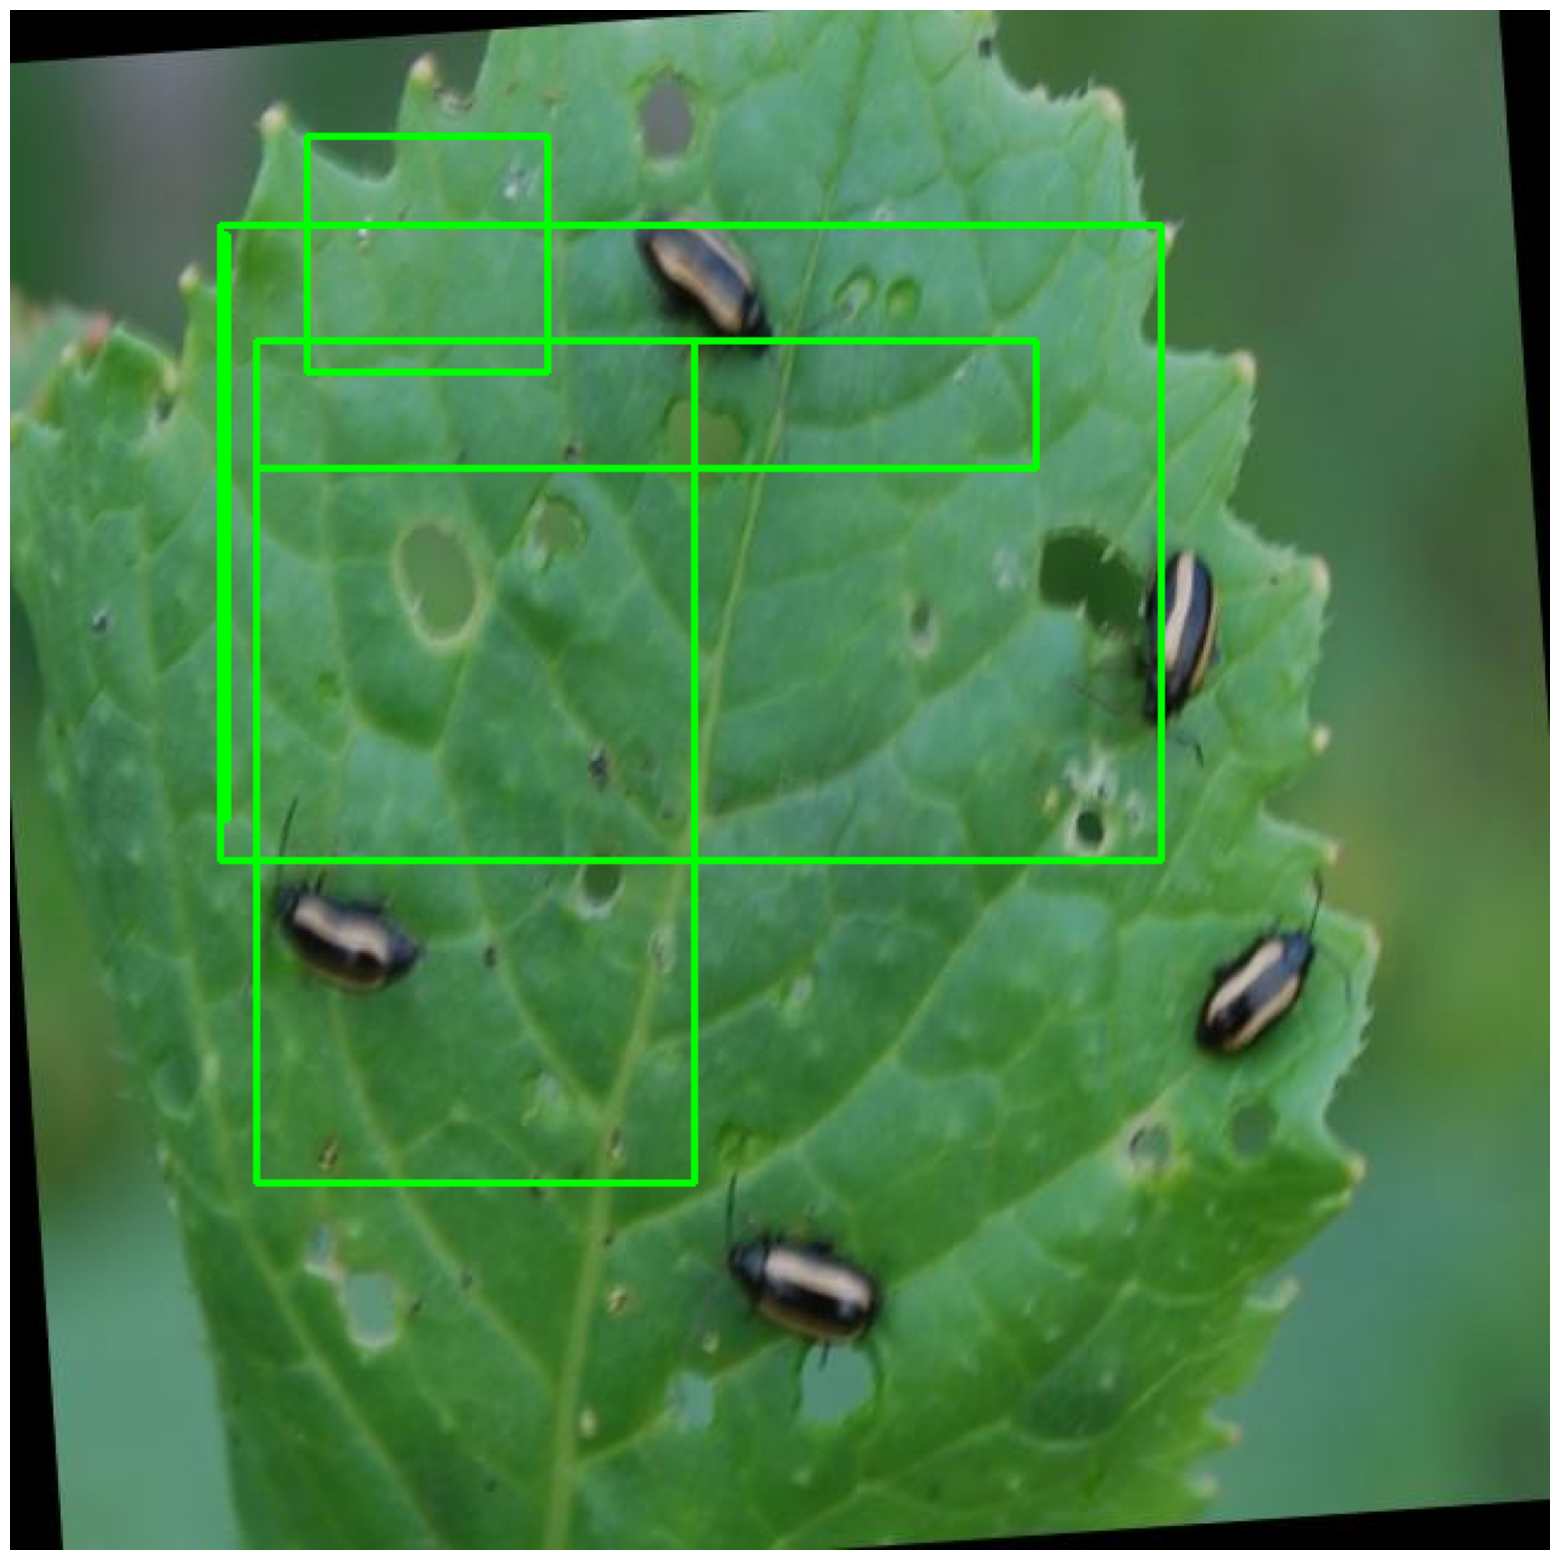

In [36]:
show(img_array, bbs=img1_bbs)

In [37]:
#img1_bbs[0][2] + img1_bbs[0][0]

In [38]:
img1_bbs_trns = [[imgbbx[0], imgbbx[1], imgbbx[0]+imgbbx[2], imgbbx[1]+imgbbx[3]]
                 for imgbbx in img1_bbs]

In [39]:
img1_bbs_trns

[[426, 190, 528, 327],
 [478, 353, 565, 442],
 [284, 487, 386, 624],
 [90, 336, 179, 429],
 [223, 52, 346, 202]]

In [40]:
subset_bbx_df = subset_df.copy()

In [41]:
#pd.DataFrame(subset_bbx_df.bbox.tolist(), index= subset_bbx_df.index)

In [42]:
annot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8043 entries, 0 to 8042
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_annotation  8043 non-null   float64
 1   image_id       8043 non-null   float64
 2   category_id    8043 non-null   float64
 3   bbox           8043 non-null   object 
 4   area           8043 non-null   float64
 5   segmentation   8043 non-null   object 
 6   iscrowd        8043 non-null   float64
 7   file_name      8043 non-null   object 
 8   image_height   8043 non-null   float64
 9   image_width    8043 non-null   float64
 10  category_name  8043 non-null   object 
 11  supercategory  8043 non-null   object 
dtypes: float64(7), object(5)
memory usage: 816.9+ KB


In [43]:
subset_bbx_df.dropna(inplace=True)#.info()

In [44]:
subset_bbx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8043 entries, 0 to 8042
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_annotation  8043 non-null   float64
 1   image_id       8043 non-null   float64
 2   category_id    8043 non-null   float64
 3   bbox           8043 non-null   object 
 4   area           8043 non-null   float64
 5   segmentation   8043 non-null   object 
 6   iscrowd        8043 non-null   float64
 7   file_name      8043 non-null   object 
 8   image_height   8043 non-null   float64
 9   image_width    8043 non-null   float64
 10  category_name  8043 non-null   object 
 11  supercategory  8043 non-null   object 
dtypes: float64(7), object(5)
memory usage: 816.9+ KB


In [45]:
subset_bbx_df[['XMin', 'YMin', 'width', 'height']] =  pd.DataFrame(subset_bbx_df.bbox.tolist(), index= subset_bbx_df.index)

subset_bbx_df['XMax'] = subset_bbx_df['XMin'] + subset_bbx_df['width']

subset_bbx_df['YMax'] = subset_bbx_df['YMin'] + subset_bbx_df['height']

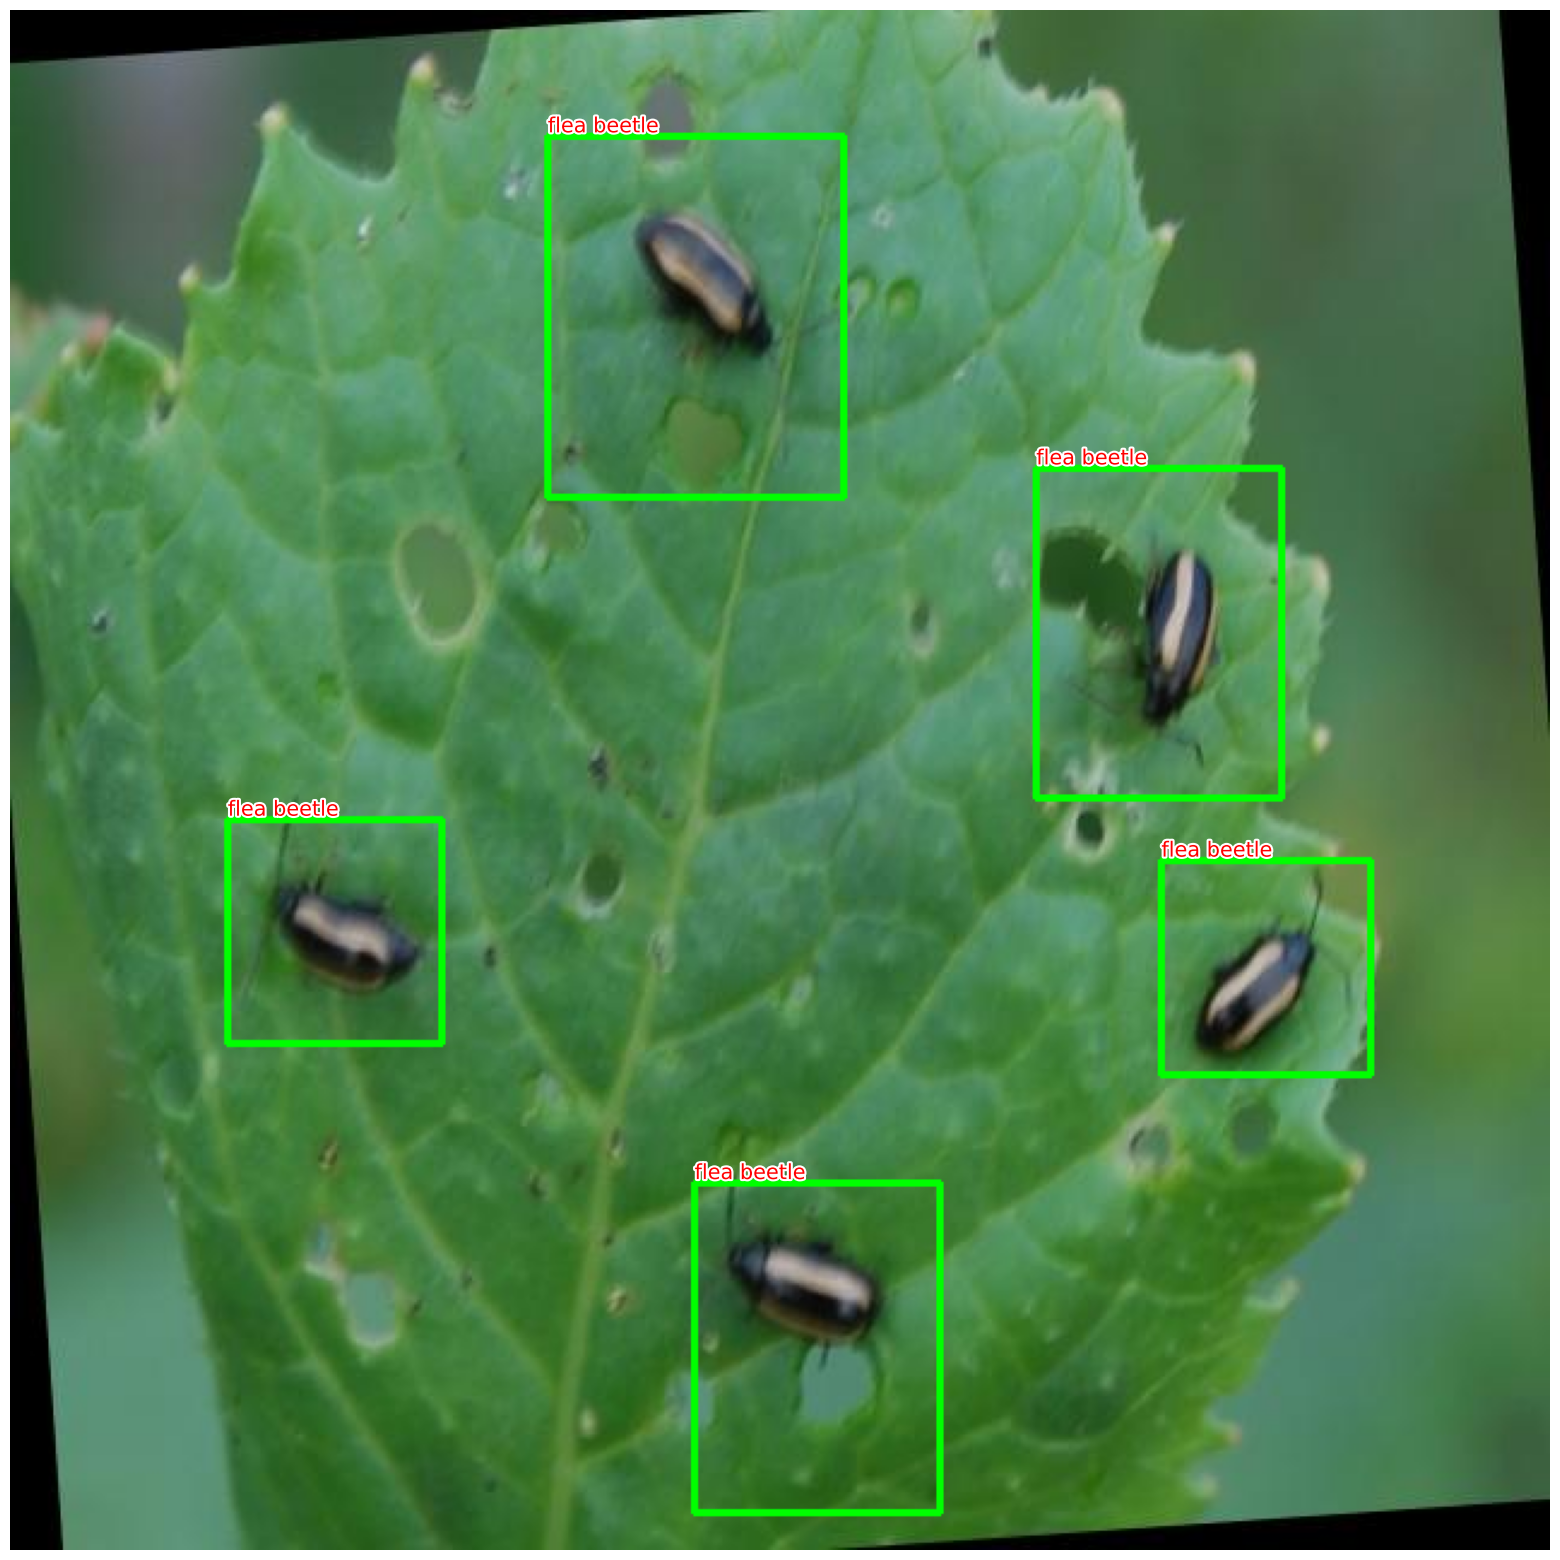

In [46]:
show(img_array, bbs=img1_bbs_trns, texts=img1_labels, text_sz=15)

In [47]:
import shutil

In [48]:
#subset_img_path = "/Users/lin/Documents/python_venvs/modern_cv_with_pytorch/chap8_advanced_obj_detection/subset_img/"

#[shutil.copy(img_path, subset_img_path) for img_path in some_img]

In [49]:
"""from torch_snippets import *
from PIL import Image
IMAGE_ROOT = 'images/images'
DF_RAW = df = pd.read_csv('df.csv')"""

"from torch_snippets import *\nfrom PIL import Image\nIMAGE_ROOT = 'images/images'\nDF_RAW = df = pd.read_csv('df.csv')"

In [50]:
"""label2target = {cat_nm: cat_id for cat_nm, cat_id in
 zip(subset_df.category_name.unique(), subset_df.category_id.unique())
 }

label2target['background'] = 0
target2label = {t:l for l,t in label2target.items()}
background_class = label2target['background']
num_classes = len(label2target)"""

"label2target = {cat_nm: cat_id for cat_nm, cat_id in\n zip(subset_df.category_name.unique(), subset_df.category_id.unique())\n }\n\nlabel2target['background'] = 0\ntarget2label = {t:l for l,t in label2target.items()}\nbackground_class = label2target['background']\nnum_classes = len(label2target)"

In [51]:
label2target = {l:t+1 for t,l in enumerate(subset_bbx_df['category_name'].unique())}
label2target['background'] = 0
target2label = {t:l for l,t in label2target.items()}
background_class = label2target['background']
num_classes = len(label2target)

In [52]:
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1)
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                              )
    img = normalize(img)
    return img.to(device).float()

In [53]:
class OpenDataset(torch.utils.data.Dataset):
    w, h = 224, 224
    def __init__(self, df, image_dir=IMAGE_ROOT):
        self.image_dir = image_dir
        self.files = glob.glob(self.image_dir+'/*')
        self.df = df
        self.image_infos = df.file_name.unique()
    def __getitem__(self, ix):
        # load images and masks
        image_id = self.image_infos[ix]
        img_path = find(image_id, self.files)
        img = Image.open(img_path).convert("RGB")
        img = np.array(img.resize((self.w, self.h), resample=Image.BILINEAR))/255.
        data = self.df[self.df['file_name'] == image_id]
        labels = data['category_name'].values.tolist()
        data = data[['XMin','YMin','XMax','YMax']].values
        data[:,[0,2]] *= self.w
        data[:,[1,3]] *= self.h
        boxes = data.astype(np.uint32).tolist() # convert to absolute coordinates
        # torch FRCNN expects ground truths as a dictionary of tensors
        target = {}
        target["boxes"] = torch.Tensor(boxes).float()
        target["labels"] = torch.Tensor([label2target[i] for i in labels]).long()
        img = preprocess_image(img)
        return img, target
    def collate_fn(self, batch):
        return tuple(zip(*batch))

    def __len__(self):
        return len(self.image_infos)

In [54]:
from sklearn.model_selection import train_test_split
trn_ids, val_ids = train_test_split(subset_bbx_df.file_name.unique(), test_size=0.1, random_state=99)
trn_df, val_df = subset_bbx_df[subset_bbx_df['file_name'].isin(trn_ids)], subset_bbx_df[subset_bbx_df['file_name'].isin(val_ids)]
len(trn_df), len(val_df)

train_ds = OpenDataset(trn_df)
test_ds = OpenDataset(val_df)

train_loader = DataLoader(train_ds, batch_size=4, collate_fn=train_ds.collate_fn, drop_last=True)
test_loader = DataLoader(test_ds, batch_size=4, collate_fn=test_ds.collate_fn, drop_last=True)

In [61]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = "cpu"
def get_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [62]:
# Defining training and validation functions for a single batch
def train_batch(inputs, model, optimizer):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad() # this will disable gradient computation in the function below
def validate_batch(inputs, model):
    model.train() # to obtain the losses, model needs to be in train mode only. # #Note that here we are not defining the model's forward method
#and hence need to work per the way the model class is defined
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    return loss, losses

In [63]:
model = get_model().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
n_epochs = 10
log = Report(n_epochs)

c:\Users\agbji\Documents\codebase\modern_cv_with_pytorch-main\venv_cv_modern\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\agbji\Documents\codebase\modern_cv_with_pytorch-main\venv_cv_modern\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [65]:
for epoch in range(n_epochs):
    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, losses = train_batch(inputs, model, optimizer)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss.item(),
                   trn_regr_loss=regr_loss.item(), trn_objectness_loss=loss_objectness.item(),
                   trn_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')

    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        loss, losses = validate_batch(inputs, model)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
          [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss.item(),
                  val_regr_loss=regr_loss.item(), val_objectness_loss=loss_objectness.item(),
                  val_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
    if (epoch+1)%(n_epochs//10)==0: log.report_avgs(epoch+1)

EPOCH: 0.020  trn_loss: nan  trn_loc_loss: nan  trn_regr_loss: nan  trn_objectness_loss: nan  trn_rpn_box_reg_loss: nan  (102.43s - 51522.09s remaining)4301440.000  (48.66s - 61265.05s remaining)

In [60]:
device

'cuda'

In [103]:
from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()

In [104]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

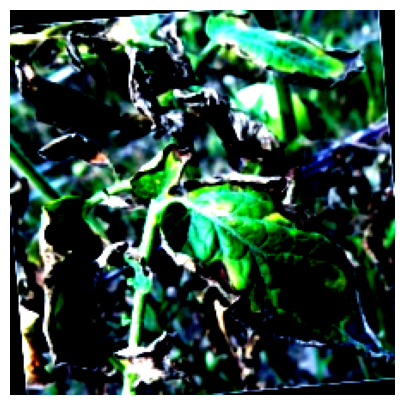

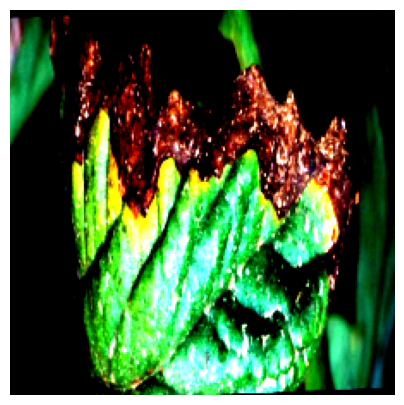

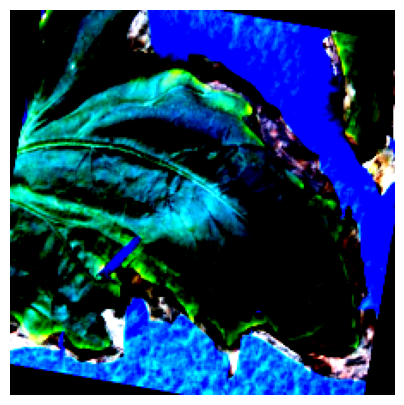

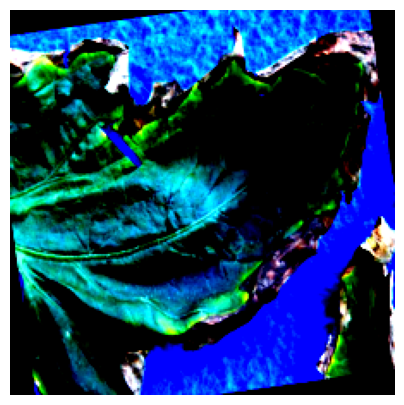

[]

[]

[]

[]

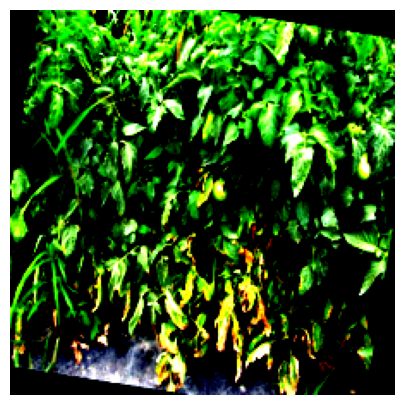

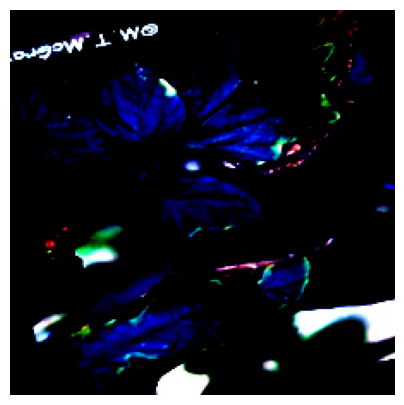

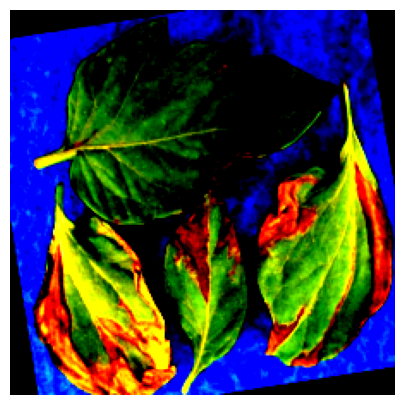

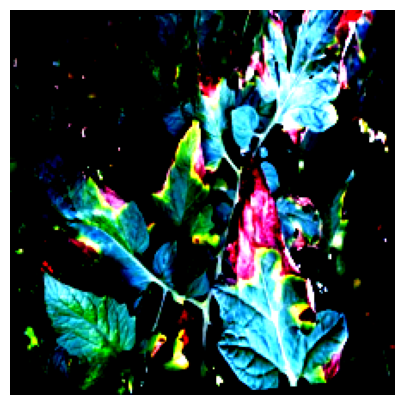

[]

[]

[]

[]

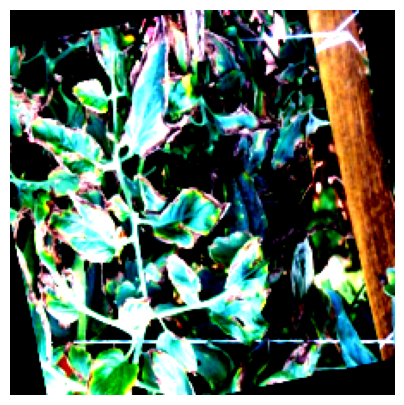

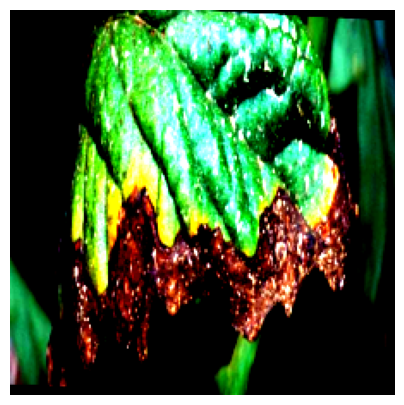

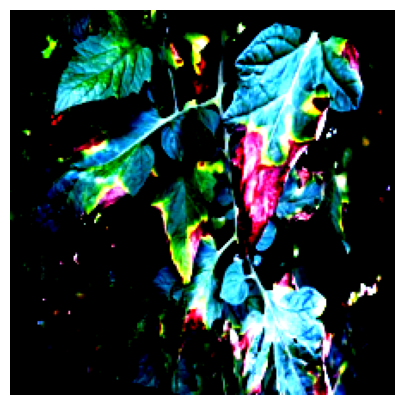

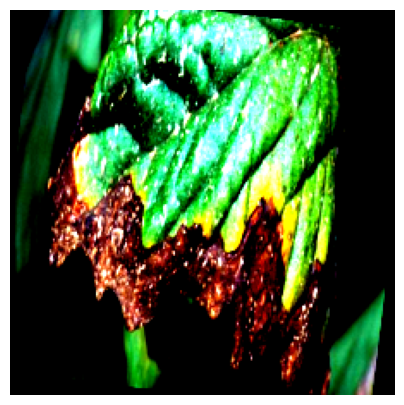

[]

[]

[]

[]

In [113]:
for ix, (images, targets) in enumerate(train_loader):
    if ix==3: break
    images = [im for im in images]
    [show(image) for image in images]
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        print(labels)

ValueError: ignored

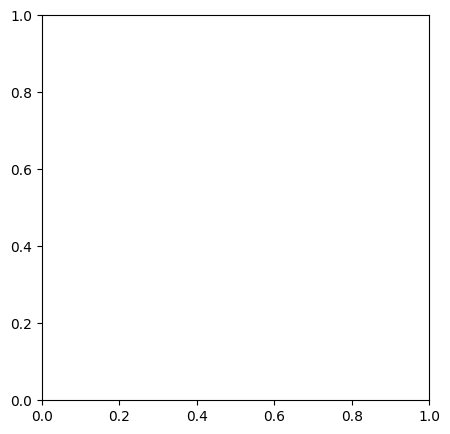

In [105]:
for ix, (images, targets) in enumerate(test_loader):
    if ix==5: break
    images = [im for im in images]
    #show(images[0])
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
        show(images[ix].cpu().permute(1,2,0), bbs=bbs, texts=labels, sz=5, text_sz=10,
             title=info)

100%|██████████| 111/111 [00:00<00:00, 438.04it/s]


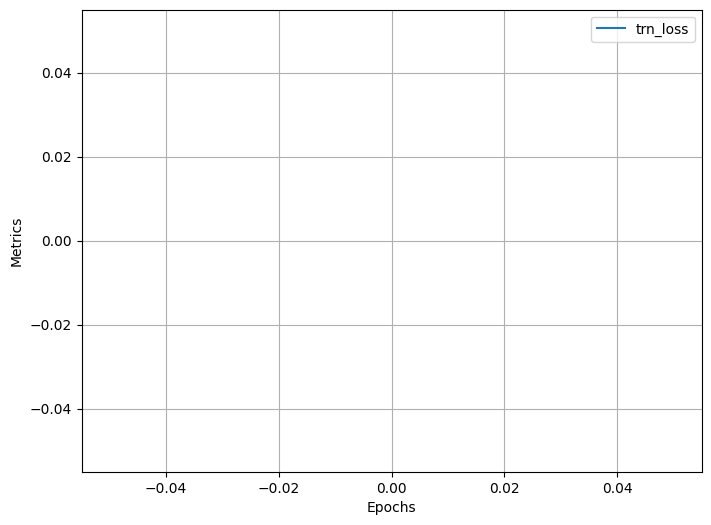

In [106]:
log.plot_epochs(['trn_loss'])

In [50]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

ValueError: ignored

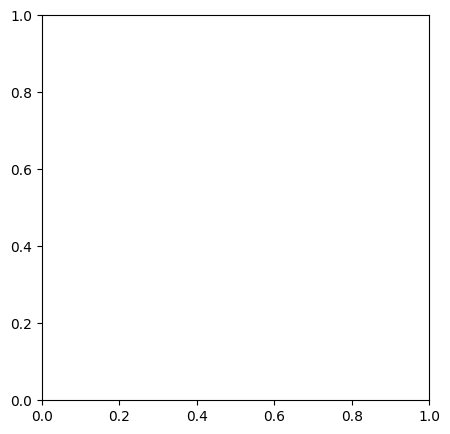

In [107]:
for ix, (images, targets) in enumerate(test_loader):
    if ix==5: break
    images = [im for im in images]
    #show(images[0])
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
        show(images[ix].cpu().permute(1,2,0), bbs=bbs, texts=labels, sz=5, text_sz=10,
             title=info)